In [1]:
import time
import copy

import pandas as pd
import geopandas as gpd
import spatial_network_analysis as sna

import numpy as np
import pandas as pd
from shapely.geometry import MultiPoint, LineString, Polygon
import momepy
import networkx as nx

# Create Graph - DONE
# define projected crs 

In [7]:
#gdf_streets = gpd.read_file("../2_Datos_Procesados/Calles_CII/Calles_topo.shp")
gdf_streets = gpd.read_file("data/CabaStreet_wgs84.zip")
gdf_streets = gdf_streets.explode().reset_index(drop=True)

gdf_streets = gdf_streets.to_crs("EPSG:5347") # ESTO PUEDE SER GENERICO DESDE UN CONFIG
gdf_streets['len_m'] = gdf_streets.length
gdf_streets.len_m = round(gdf_streets.len_m, 2)
gdf_streets = gdf_streets.to_crs("EPSG:4326")
gdf_streets['ttime_walking'] = gdf_streets['len_m'] / 80 # O POR 60'?
gdf_streets['id'] = list(gdf_streets.index)

gdf_streets[['id', 'len_m', 'ttime_walking', 'geometry']].to_file("data/Calles_topo_timetravel.shp")

/tmp/ipykernel_802967/1361442260.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  gdf_streets = gdf_streets.explode().reset_index(drop=True)
/tmp/ipykernel_802967/1361442260.py:12: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_streets[['id', 'len_m', 'ttime_walking', 'geometry']].to_file("data/Calles_topo_timetravel.shp")


In [8]:
gdf, G, nodes, edges, mapping_nodes = sna.create_graph_from_file("data/Calles_topo_timetravel.shp", "3857")
print(len(G.nodes), len(mapping_nodes['map_nodes']))

17844 17844


# LOOP OVER LOCATIONS

In [35]:
gdf_locations = gpd.read_file("data/public_space.geojson", driver="GeoJSON")

len(gdf_locations)

1896

In [40]:
#gdf_locations = gpd.read_file("data/public_space.geojson", driver="GeoJSON")
gdf_locations = gdf_locations.to_crs("3857")
gdf_locations = gdf_locations.explode(index_parts=True).reset_index(drop=True)
gdf_locations = gdf_locations.loc[gdf_locations.COMUNA == 5].reset_index(drop=True)
gdf_locations['id'] = list(gdf_locations.index +1)
gdf_locations.to_file("data/locations.geojson", driver='GeoJSON')
# gdf_locations = gdf_locations.iloc[:5]
print(len(gdf_locations))
v_loc_type = 'polygon'

194


<Axes: >

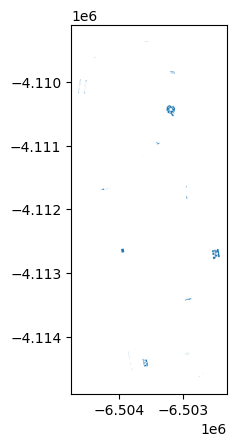

In [41]:
gdf_locations.plot()

In [4]:
# error por suma de costo
""" print(len(G.nodes), len(mapping_nodes['map_nodes']))
gdf_locations_389 = gdf_locations.loc[(gdf_locations.id == 389)]
gdf_locations_389.to_file("./data_output/locations_389.geojson", driver='GeoJSON')
gdf_service_edges_389, gdf_service_locs_edges_389, gpd_all_service_areas_389 = sna.create_service_areas_for_locations(gdf_locations_389, 'polygon', G, nodes, edges, mapping_nodes, [5, 10, 15], 'ttime_walk', 20, 10, 200)
gdf_service_edges_389.to_file("./data_output/service_area_edges_389.geojson", driver='GeoJSON')
gdf_service_locs_edges_389.to_file("./data_output/service_area_locs_edges_389.geojson", driver='GeoJSON')
print(len(G.nodes), len(mapping_nodes['map_nodes'])) """

' print(len(G.nodes), len(mapping_nodes[\'map_nodes\']))\ngdf_locations_389 = gdf_locations.loc[(gdf_locations.id == 389)]\ngdf_locations_389.to_file("./data_output/locations_389.geojson", driver=\'GeoJSON\')\ngdf_service_edges_389, gdf_service_locs_edges_389, gpd_all_service_areas_389 = sna.create_service_areas_for_locations(gdf_locations_389, \'polygon\', G, nodes, edges, mapping_nodes, [5, 10, 15], \'ttime_walk\', 20, 10, 200)\ngdf_service_edges_389.to_file("./data_output/service_area_edges_389.geojson", driver=\'GeoJSON\')\ngdf_service_locs_edges_389.to_file("./data_output/service_area_locs_edges_389.geojson", driver=\'GeoJSON\')\nprint(len(G.nodes), len(mapping_nodes[\'map_nodes\'])) '

In [42]:
gdf_service_edges, gdf_service_locs_edges, gpd_all_service_areas = sna.create_service_areas_for_locations(gdf_locations, 'polygon', G, nodes, edges, mapping_nodes, [5, 10, 15], 'ttime_walk', 20, 10, 200)
gdf_service_edges.to_file("data/service_area_edges.geojson", driver='GeoJSON')
gdf_service_locs_edges.to_file("data/service_area_locs_edges.geojson", driver='GeoJSON')
gpd_all_service_areas.to_file("data/service_areas.geojson", driver='GeoJSON')

Location id 4 not connected to network (d>20)
Location id 5 not connected to network (d>20)
Location id 6 not connected to network (d>20)
Location id 7 not connected to network (d>20)
Location id 8 not connected to network (d>20)
Location id 9 not connected to network (d>20)
Location id 10 not connected to network (d>20)
Location id 11 not connected to network (d>20)
Location id 12 not connected to network (d>20)
Location id 28 not connected to network (d>20)
Location id 35 not connected to network (d>20)
Location id 39 not connected to network (d>20)
Location id 40 not connected to network (d>20)
Location id 41 not connected to network (d>20)
Location id 187 not connected to network (d>20)
Location id 189 not connected to network (d>20)
Location id 190 not connected to network (d>20)
Location id 192 not connected to network (d>20)
Location id 193 not connected to network (d>20)


In [43]:
gpd_all_service_areas_rings = sna.dissolve_service_areas_polygons( gpd_all_service_areas, v_type='rings')
gpd_all_service_areas_rings.to_file("data/service_area_rings.geojson", driver='GeoJSON')

## RESULTS

In [44]:
nodes_in = nodes.sjoin(gpd.GeoDataFrame(geometry=gdf_locations.buffer(20)))
nodes_in = nodes_in.drop_duplicates(subset='nodeID').reset_index(drop=True)
node_list = list(nodes_in.node_id)

In [45]:
result = nx.multi_source_dijkstra_path_length(G, 
                                     sources = list(pd.Series(node_list).map(lambda row: mapping_nodes['map_nodes'][row][0])), 
                                     cutoff=None, 
                                     weight='ttime_walk')

In [46]:
df = pd.DataFrame(result.items(), columns=['node_to', 'cost_to'])
df['node_id'] = df['node_to'].map(lambda row: mapping_nodes['map_coords'][row][0])
df = df[['node_id', 'node_to', 'cost_to']]


,node_id,node_to,cost_to
0,4436,"(-6504517.076384987, -4109947.3888889328)",0.0
1,4437,"(-6504608.976687516, -4109935.9889551606)",0.0
2,4655,"(-6504636.839145145, -4110187.296437925)",0.0
3,4692,"(-6504657.422685768, -4110185.902715629)",0.0
4,4886,"(-6503268.676778667, -4110467.342795268)",0.0


In [47]:
df['cost_to'].unique()

array([  0.      ,   0.220625,   0.321625, ..., 134.16925 , 134.325375,
       134.863875])

In [48]:
# Asigna peso a nodos
df_nodes= nodes.merge(df[['node_id', 'cost_to']], on='node_id', how='left')
df_nodes= df_nodes[['nodeID', 'geometry', 'cost_to']]

In [49]:
df_nodes.to_file("data/nodes_cost.geojson", driver='GeoJSON')
df_nodes.sample()

,nodeID,geometry,cost_to
4929,4929,POINT (-6513441.782 -4110400.843),96.97025


In [55]:
# Asigna peso a ejes
df_edges = edges.merge(df[['node_id', 'cost_to']], left_on='node_start', right_on='node_id', how='left')
df_edges = df_edges.merge(df[['node_id', 'cost_to']], left_on='node_end', right_on='node_id', how='left')
df_edges.rename(columns={'cost_to_x':'cost_to_start', 'cost_to_y':'cost_to_end'}, inplace=True)

<Axes: >

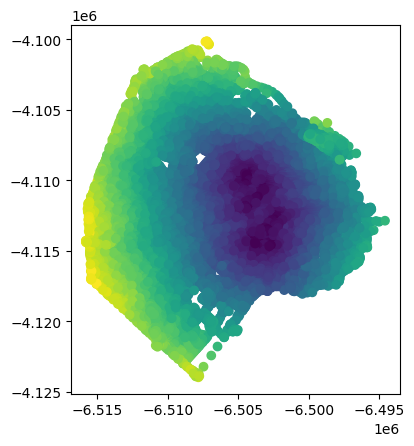

In [53]:
df_nodes.plot(column='cost_to', cmap='viridis')

<Axes: >

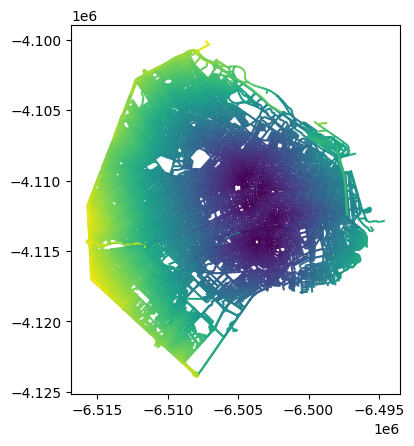

In [57]:
df_edges.plot(column='cost_to_end', cmap='viridis')